# Hospital Costs.

This project aims at estimating the cost one incurs based on their age, gender, bmi, smoking status and region they come from.
Linear Regression model is used to access whether there is a linear relationship between the indepenent variables listed above and dependent variable charges.

Dataset: Medical Cost Personal Datasets from Kaggle. 
(https://www.kaggle.com/mirichoi0218/insurance/activity)

In [4]:
# Import Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [7]:
# Load dataset

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.shape

(1338, 7)

# Data Cleaning

In [23]:
# Drop No of children column since it does not directly contribute to the hospital charges one incurs.
df1 = df.drop(['children'], axis = 'columns')
df1.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [24]:
# check if there are any null values
df1.isnull().sum()

# if any were available you can take the median value to replace the null values.
# or drop the na values using df.dropna()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [34]:
# Function that converts values in age, bmi and charges to floats
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
# Ensure age column only contains int or float values
df1[~df1['age'].apply(is_float)]

,age,sex,bmi,smoker,region,charges


In [36]:
# Ensure bmi column only contains int or float values
df1[~df1['bmi'].apply(is_float)]

,age,sex,bmi,smoker,region,charges


In [37]:
# Ensure charges column only contains int or float values
df1[~df1['charges'].apply(is_float)]

,age,sex,bmi,smoker,region,charges


# Feature Engineering and Dimensionality Reduction

In [38]:
df2 = df1.copy()

In [42]:
df2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [43]:
df2.sex.unique()

array(['female', 'male'], dtype=object)

In [44]:
df2.groupby('region')['region'].agg('count')

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

In [45]:
df2.groupby('sex')['sex'].agg('count')

sex
female    662
male      676
Name: sex, dtype: int64

In [46]:
df2.groupby('smoker')['smoker'].agg('count')

smoker
no     1064
yes     274
Name: smoker, dtype: int64

In [48]:
df2.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


# Outlier Detection and removal

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

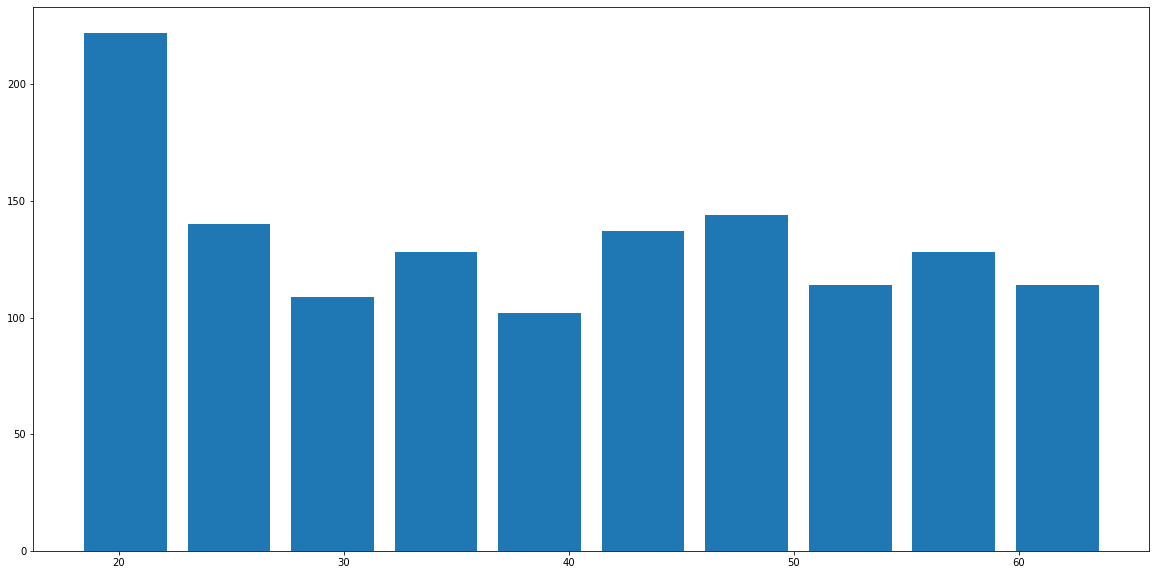

In [62]:
# Data distribution based on age
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df2.age, rwidth = 0.8)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

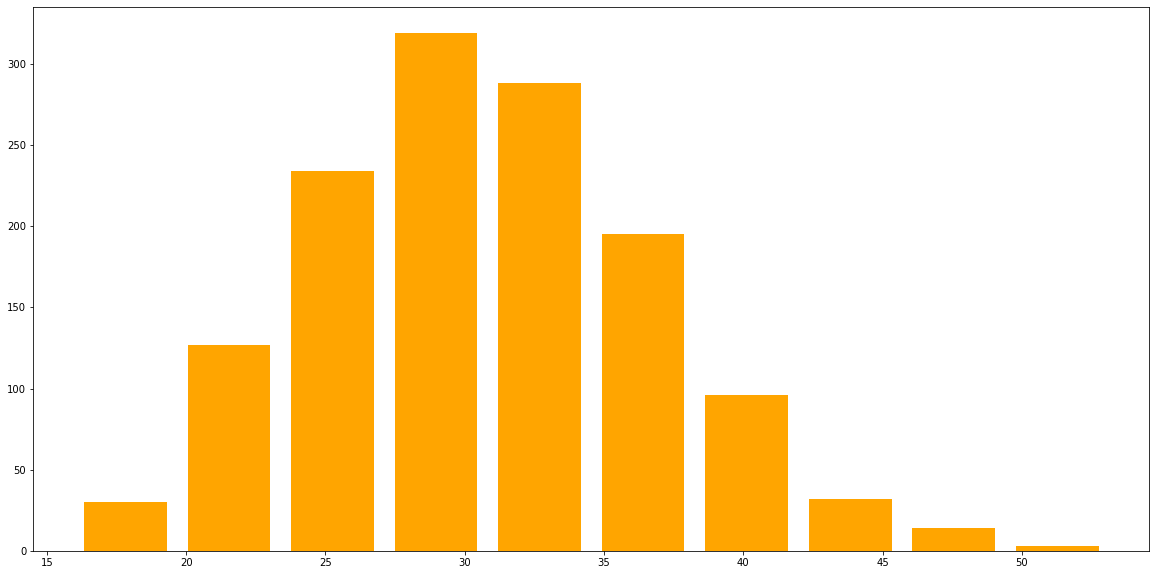

In [63]:
# Data distribution based on bmi
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df2.bmi, rwidth = 0.8, color = 'orange')

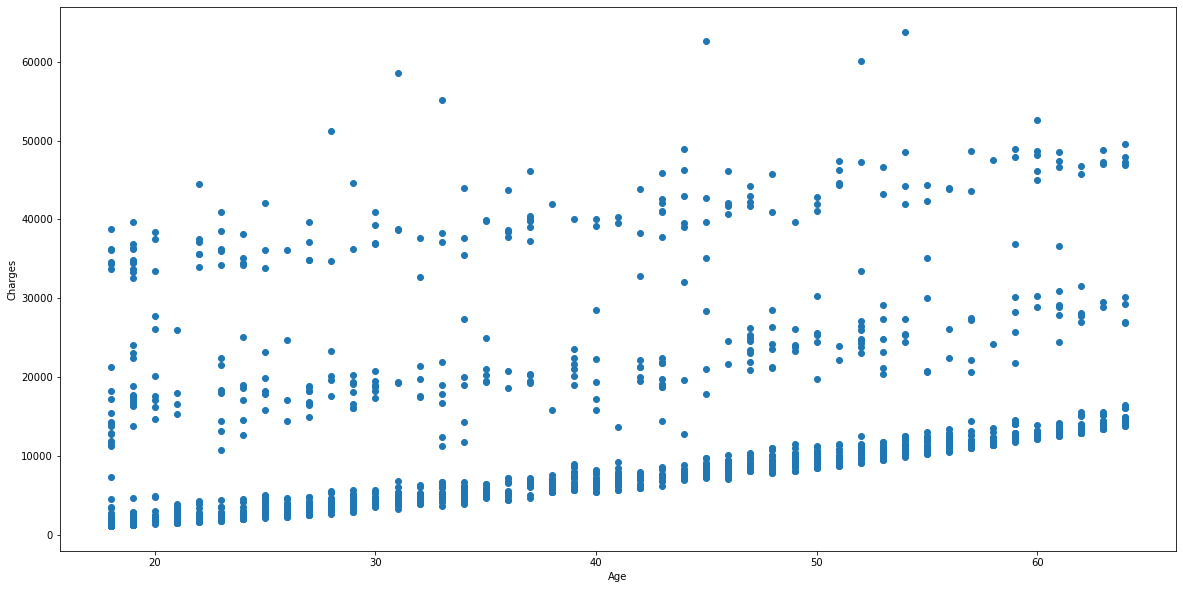

In [64]:
plt.xlabel('Age')
plt.ylabel('Charges')
plt.scatter(df2.age, df2.charges)

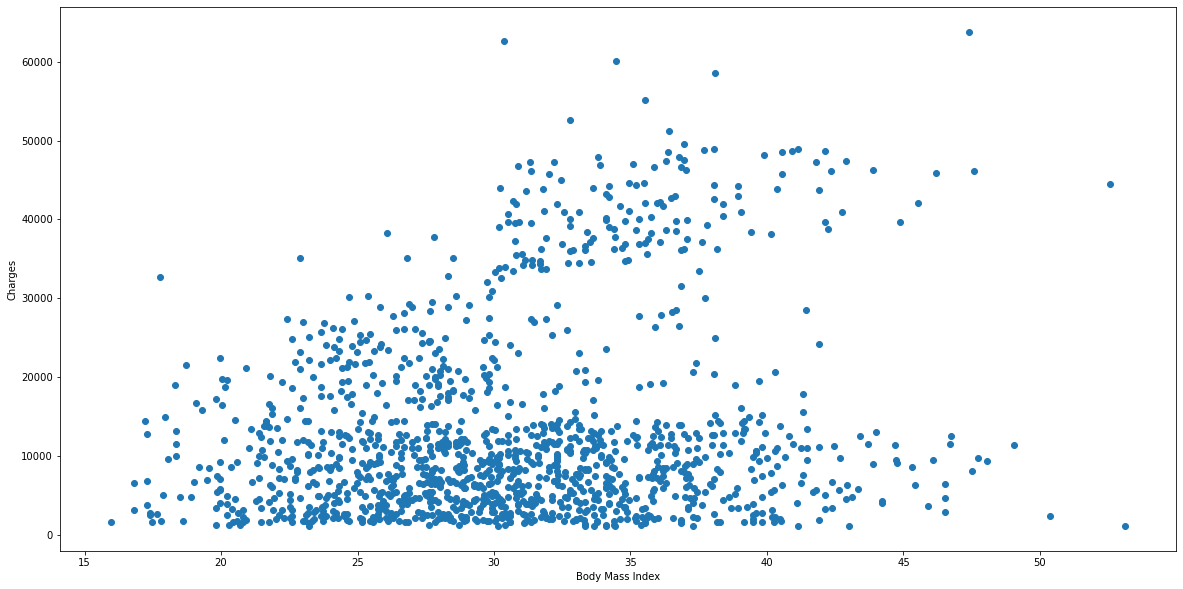

In [65]:
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.scatter(df2.bmi, df2.charges)

# Model building

In [66]:
df2.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [70]:
# one hot encoding on the sex, smoker and region columns
gender_dummies = pd.get_dummies(df2.sex)
gender_dummies.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [71]:
smoker_dummies = pd.get_dummies(df2.smoker)
smoker_dummies.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [72]:
region_dummies = pd.get_dummies(df2.region)
region_dummies.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [112]:
# to avoid dummies trap drop a column in each category

df3 = pd.concat([df2, gender_dummies.drop('female', axis = 'columns'), smoker_dummies.drop('no', axis = 'columns'), region_dummies.drop('southwest', axis = 'columns')], axis = 'columns')
df3.head()

,age,sex,bmi,smoker,region,charges,male,yes,northeast,northwest,southeast
0,19,female,27.900,yes,southwest,16884.92400,0,1,0,0,0
1,18,male,33.770,no,southeast,1725.55230,1,0,0,0,1
2,28,male,33.000,no,southeast,4449.46200,1,0,0,0,1
3,33,male,22.705,no,northwest,21984.47061,1,0,0,1,0
4,32,male,28.880,no,northwest,3866.85520,1,0,0,1,0


In [113]:
df4 = df3.drop(['sex', 'smoker', 'region'], axis = 'columns')
df4.head()

,age,bmi,charges,male,yes,northeast,northwest,southeast
0,19,27.900,16884.92400,0,1,0,0,0
1,18,33.770,1725.55230,1,0,0,0,1
2,28,33.000,4449.46200,1,0,0,0,1
3,33,22.705,21984.47061,1,0,0,1,0
4,32,28.880,3866.85520,1,0,0,1,0


In [114]:
df4.shape

(1338, 8)

In [115]:
x = df4.drop(['charges'], axis = 'columns')
x.head()

,age,bmi,male,yes,northeast,northwest,southeast
0,19,27.900,0,1,0,0,0
1,18,33.770,1,0,0,0,1
2,28,33.000,1,0,0,0,1
3,33,22.705,1,0,0,1,0
4,32,28.880,1,0,0,1,0


In [116]:
y = df4.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [117]:
# divide dataset into train and test dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [118]:
# linear Regression model
from sklearn.linear_model import LinearRegression

linear_reg_clf = LinearRegression()
linear_reg_clf.fit(X_train, y_train)
linear_reg_clf.score(X_test, y_test)

0.6962170651141536

In [119]:
# k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.79669779, 0.74457794, 0.70711455, 0.77070265, 0.80673479])

In [120]:
# compare different regression algorithms
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [121]:
def best_algo_using_grindsearchcv(x,y):
    algos = {
        'linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
            
        },
        'lasso':{
            'model': Lasso(),
            'params' : {
               'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best score': gs.best_score_,
            'best params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best score', 'best params'])

best_algo_using_grindsearchcv(x,y)

,model,best score,best params
0,linear Regression,0.765166,{'normalize': True}
1,lasso,0.765197,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision tree,0.736969,"{'criterion': 'mse', 'splitter': 'random'}"


In [123]:
# Order by performance - Lasso Regression, Linear Regression, Decision Tree